Data Pre Processing

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import ast

In [ ]:
import pandas as pd


data = pd.read_csv('NewData_4.csv')

# Display the first few rows of the dataset
print("Original Dataset:")
print(data.head())

# Drop 'Email', 'Phone Number', and 'Skin Concerns' columns
columns_to_drop = ['Email', 'Phone Number', 'Skin Concerns', 'Recommended Products',
                   'Unnamed: 14', 'Unnamed: 15']
data_processed = data.drop(columns=columns_to_drop)




Original Dataset:
                    Name                             Email Phone Number  \
0              Tharushi      tharushiindrakumara@gmail.com    915676065   
1   Tharindi Theekshani       tharinditheekshani@gmail.com    763741869   
2  Raveesha Weerasinghe   raveesha.weerasinghe22@gmail.com    703206240   
3       Sarani Savindya         saranisalwathura@gmail.com    703477939   
4               Jayanthi             Jmasakorala@yahoo.com    714027368   

   Gender       Age Skin Type        Skin Concerns  Acne  Aging  Dark spots  \
0  Female     20-30       Dry              Dryness   0.0    0.0         0.0   
1  Female     20-30       Dry              Dryness   0.0    0.0         0.0   
2  Female     20-30       Dry  Dark spots, Dryness   0.0    0.0         1.0   
3  Female     20-30       Dry              Dryness   0.0    0.0         0.0   
4  Female  Above 50       Dry                Aging   0.0    1.0         0.0   

   Dryness  Uneven Recommended Products  Product  Unname

In [ ]:
print(data_processed.head())

                    Name  Gender       Age Skin Type  Acne  Aging  Dark spots  \
0              Tharushi   Female     20-30       Dry   0.0    0.0         0.0   
1   Tharindi Theekshani   Female     20-30       Dry   0.0    0.0         0.0   
2  Raveesha Weerasinghe   Female     20-30       Dry   0.0    0.0         1.0   
3       Sarani Savindya   Female     20-30       Dry   0.0    0.0         0.0   
4               Jayanthi  Female  Above 50       Dry   0.0    1.0         0.0   

   Dryness  Uneven  Product  
0      1.0     0.0      2.0  
1      1.0     0.0      2.0  
2      1.0     0.0      2.0  
3      1.0     0.0      2.0  
4      0.0     0.0      2.0  


In [ ]:
# Display the number of rows before dropping
print("Number of rows before dropping:", len(data))

# Drop rows after row number 300
row_to_keep = 300
data = data.iloc[:row_to_keep]

# Display the number of rows after dropping
print("Number of rows after dropping:", len(data))

Number of rows before dropping: 999
Number of rows after dropping: 300



Columns after dropping:
Index(['Name', 'Email', 'Phone Number', 'Gender', 'Age', 'Skin Type',
       'Skin Concerns', 'Acne', 'Aging', 'Dark spots', 'Dryness',
       'Uneven texture or toner', 'Recommended Products', 'Product'],
      dtype='object')


Number of rows before dropping: 1000
Number of rows after dropping: 299


In [ ]:
# Label Encoding for 'Age', 'Skin Type', and 'Gender' columns
label_encoder = LabelEncoder()

columns_to_encode = ['Age', 'Skin Type', 'Gender']
for col in columns_to_encode:
    data_processed[col] = label_encoder.fit_transform(data_processed[col])

# Display the processed dataset
print("\nProcessed Dataset:")
print(data_processed.head())

# Save the processed dataset to a new file
data_processed.to_csv('processed_dataset.csv', index=False)  # Save the processed dataset to a new CSV file
print("\nProcessed dataset saved as 'processed_dataset.csv'")




Processed Dataset:
                    Name  Gender  Age  Skin Type  Acne  Aging  Dark spots  \
0              Tharushi        0    0          1   0.0    0.0         0.0   
1   Tharindi Theekshani        0    0          1   0.0    0.0         0.0   
2  Raveesha Weerasinghe        0    0          1   0.0    0.0         1.0   
3       Sarani Savindya        0    0          1   0.0    0.0         0.0   
4               Jayanthi       0    3          1   0.0    1.0         0.0   

   Dryness  Uneven  Product  
0      1.0     0.0      2.0  
1      1.0     0.0      2.0  
2      1.0     0.0      2.0  
3      1.0     0.0      2.0  
4      0.0     0.0      2.0  

Processed dataset saved as 'processed_dataset.csv'


Exploratry Data Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
data = pd.read_csv('processed_dataset.csv')  # Replace 'processed_dataset.csv' with your actual processed dataset file path

# Display basic statistics of numerical columns
print("Summary Statistics:")
print(data.describe())



Summary Statistics:
           Gender         Age   Skin Type        Acne       Aging  Dark spots  \
count  999.000000  999.000000  999.000000  299.000000  299.000000  299.000000   
mean     1.453453    3.618619    4.050050    0.414716    0.140468    0.491639   
std      0.862016    2.188441    1.617012    0.493499    0.348055    0.500768   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000    0.000000    3.000000    0.000000    0.000000    0.000000   
50%      2.000000    5.000000    5.000000    0.000000    0.000000    0.000000   
75%      2.000000    5.000000    5.000000    1.000000    0.000000    1.000000   
max      2.000000    5.000000    5.000000    1.000000    1.000000    1.000000   

          Dryness      Uneven     Product  
count  299.000000  299.000000  299.000000  
mean     0.357860    0.317726   15.063545  
std      0.480174    0.466373    8.502229  
min      0.000000    0.000000    2.000000  
25%      0.000000    0.000000 

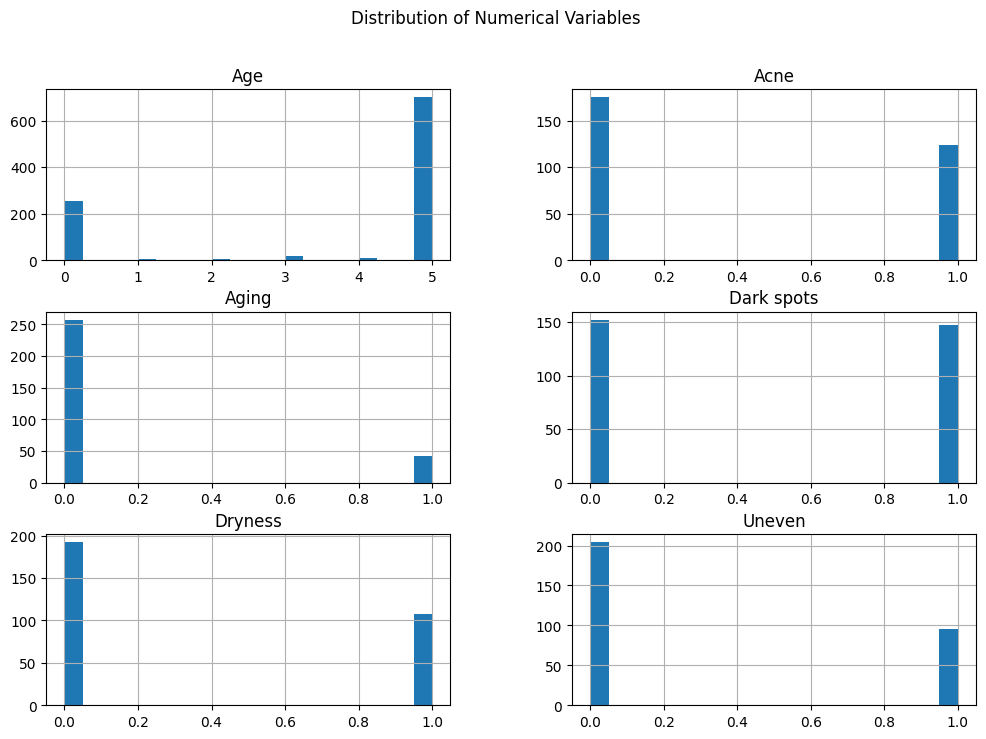

In [ ]:
# Distribution of numerical variables
numerical_columns = ['Age', 'Acne', 'Aging', 'Dark spots', 'Dryness', 'Uneven']
data[numerical_columns].hist(bins=20, figsize=(12, 8))
plt.suptitle('Distribution of Numerical Variables')
plt.show()



<ipython-input-13-832ec9ed43d8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


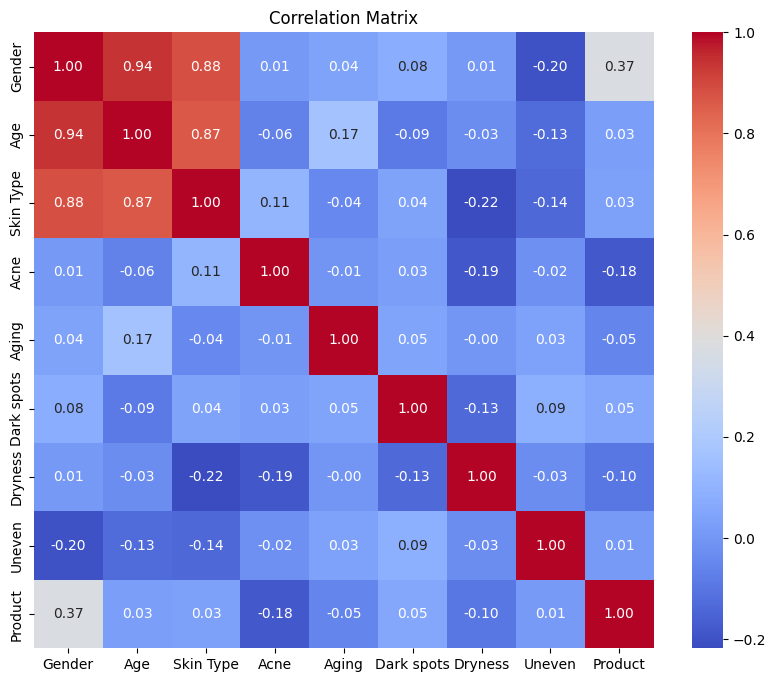

In [ ]:
# Correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()




In [ ]:
# Select relevant columns
selected_columns = ['Age', 'Skin Type']
subset_data = data[selected_columns]

# Compute correlation matrix
correlation_matrix = subset_data.corr()

# Display the correlation matrix
print(correlation_matrix)

                Age  Skin Type
Age        1.000000   0.866468
Skin Type  0.866468   1.000000


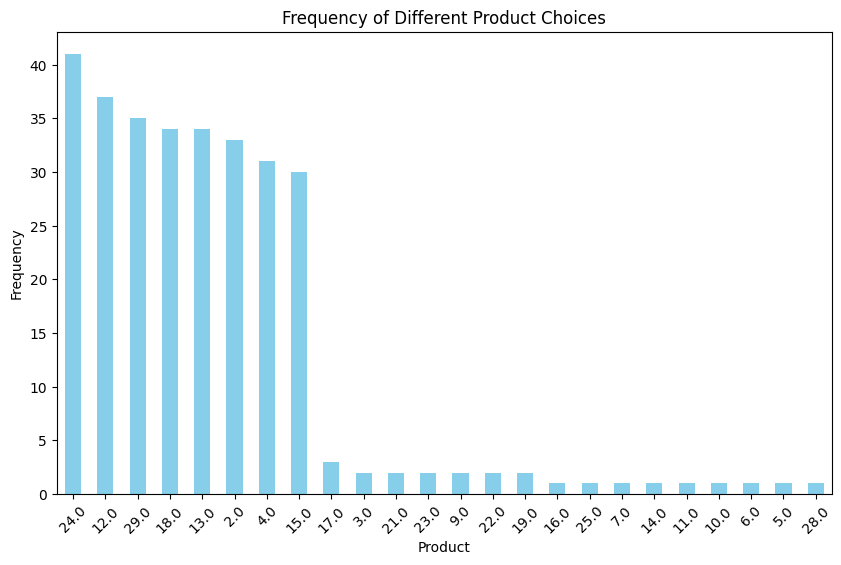

In [ ]:
# Frequency of different product choices
plt.figure(figsize=(10, 6))
product_counts = data['Product'].value_counts()
product_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Different Product Choices')
plt.xlabel('Product')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import pandas as pd


# Assuming 'Product' is the column containing product information in your dataset
product_counts = data['Product'].value_counts()

# Display the counts
print("Product Frequencies:")
print(product_counts)


Product Frequencies:
24.0    41
12.0    37
29.0    35
18.0    34
13.0    34
2.0     33
4.0     31
15.0    30
17.0     3
3.0      2
21.0     2
23.0     2
9.0      2
22.0     2
19.0     2
16.0     1
25.0     1
7.0      1
14.0     1
11.0     1
10.0     1
6.0      1
5.0      1
28.0     1
Name: Product, dtype: int64


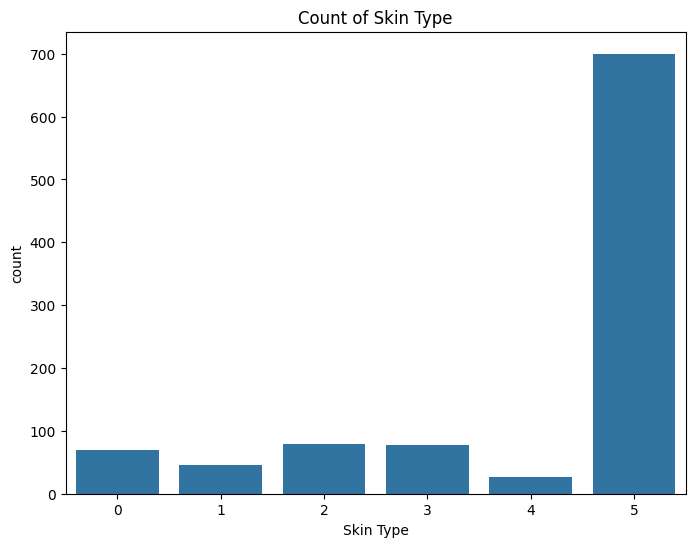

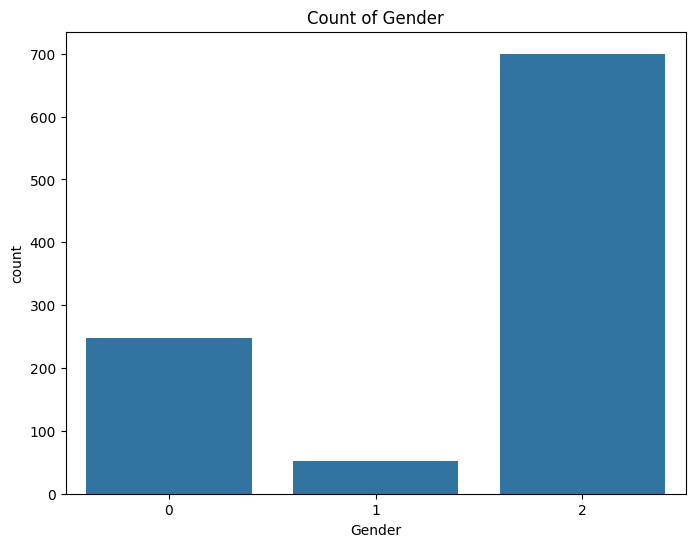

Cross-tabulation of Skin Type and Age Group:
Age         0  1  2  3  4    5
Skin Type                     
0          62  0  1  3  3    0
1          39  2  1  2  2    0
2          62  3  2  9  3    0
3          71  1  1  2  3    0
4          23  2  1  1  0    0
5           0  0  0  0  0  700


In [ ]:
# Count plots for categorical variables
categorical_columns = ['Skin Type', 'Gender']
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=data)
    plt.title(f'Count of {col}')
    plt.show()

# Cross-tabulation
cross_tab = pd.crosstab(data['Skin Type'], data['Age'])
print("Cross-tabulation of Skin Type and Age Group:")
print(cross_tab)


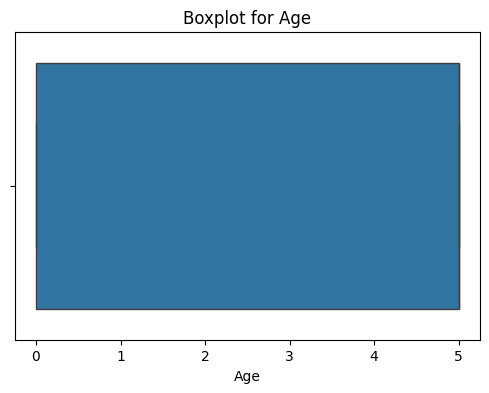

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Age', data=data)
plt.title('Boxplot for Age')
plt.show()


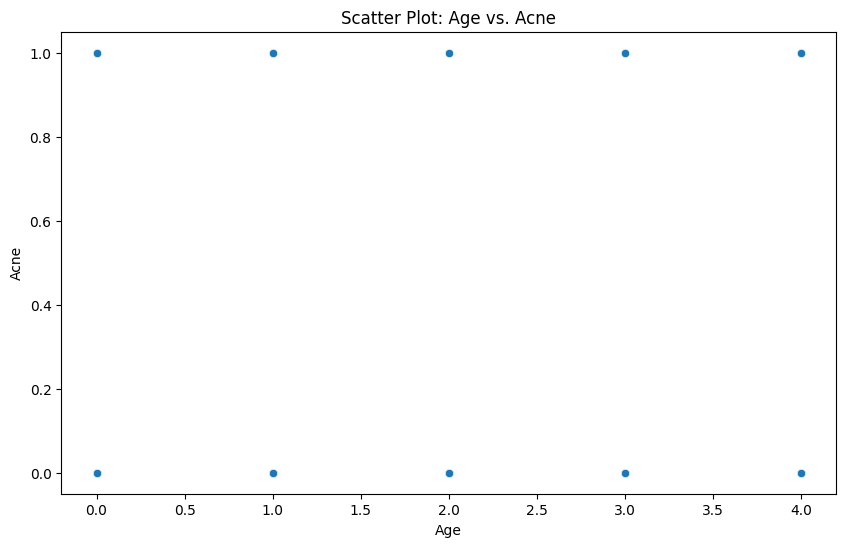

In [ ]:
# Scatter plot: Age vs. specific skin concern
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Acne', data=data)
plt.title('Scatter Plot: Age vs. Acne')
plt.xlabel('Age')
plt.ylabel('Acne')
plt.show()


Feature Engineering

In [ ]:
print(data)

                      Name  Gender  Age  Skin Type  Acne  Aging  Dark spots  \
0                Tharushi        0    0          1   0.0    0.0         0.0   
1     Tharindi Theekshani        0    0          1   0.0    0.0         0.0   
2    Raveesha Weerasinghe        0    0          1   0.0    0.0         1.0   
3         Sarani Savindya        0    0          1   0.0    0.0         0.0   
4                 Jayanthi       0    3          1   0.0    1.0         0.0   
..                     ...     ...  ...        ...   ...    ...         ...   
994                    NaN       2    5          5   NaN    NaN         NaN   
995                    NaN       2    5          5   NaN    NaN         NaN   
996                    NaN       2    5          5   NaN    NaN         NaN   
997                    NaN       2    5          5   NaN    NaN         NaN   
998                    NaN       2    5          5   NaN    NaN         NaN   

     Dryness  Uneven  Product  
0        1.0     0.

In [ ]:
import pandas as pd

data = pd.read_csv('processed_dataset.csv')
product_counts = data['Product'].value_counts()

# Display the counts
print("Product Frequencies:")
print(product_counts)


Product Frequencies:
24.0    41
12.0    37
29.0    35
18.0    34
13.0    34
2.0     33
4.0     31
15.0    30
17.0     3
3.0      2
21.0     2
23.0     2
9.0      2
22.0     2
19.0     2
16.0     1
25.0     1
7.0      1
14.0     1
11.0     1
10.0     1
6.0      1
5.0      1
28.0     1
Name: Product, dtype: int64


In [ ]:
# Define a function to replace values
def replace_products(val):
    if val not in [4, 12, 24, 15, 18, 13, 29, 2]:
        return 9
    else:
        return val

# Apply the function to the 'Product' column
data['Product'] = data['Product'].apply(replace_products)

# Display the updated 'Product' column
print(data['Product'])


0      2.0
1      2.0
2      2.0
3      2.0
4      2.0
      ... 
994    9.0
995    9.0
996    9.0
997    9.0
998    9.0
Name: Product, Length: 999, dtype: float64


In [ ]:
import pandas as pd



product_counts = data['Product'].value_counts()

# Display the counts
print("Product Frequencies:")
print(product_counts)


Product Frequencies:
9.0     724
24.0     41
12.0     37
29.0     35
18.0     34
13.0     34
2.0      33
4.0      31
15.0     30
Name: Product, dtype: int64


In [ ]:


# Display the column before replacement
print("Product column before replacement:")
print(data['Product'])

# Replace all occurrences of 4 with 1 in the 'Product' column
data['Product'] = data['Product'].replace(12, 1)
data['Product'] = data['Product'].replace(4, 10)
data['Product'] = data['Product'].replace(18, 3)
data['Product'] = data['Product'].replace(15, 4)
data['Product'] = data['Product'].replace(2, 5)
data['Product'] = data['Product'].replace(29, 6)
data['Product'] = data['Product'].replace(24, 7)
data['Product'] = data['Product'].replace(13, 8)

# Display the  column after replacement
print("\nProduct column after replacement:")
print(data['Product'])


Product column before replacement:
0      2.0
1      2.0
2      2.0
3      2.0
4      2.0
      ... 
994    9.0
995    9.0
996    9.0
997    9.0
998    9.0
Name: Product, Length: 999, dtype: float64

Product column after replacement:
0      5.0
1      5.0
2      5.0
3      5.0
4      5.0
      ... 
994    9.0
995    9.0
996    9.0
997    9.0
998    9.0
Name: Product, Length: 999, dtype: float64


In [ ]:
import pandas as pd

product_counts = data['Product'].value_counts()

# Display the counts
print("Product Frequencies:")
print(product_counts)

Product Frequencies:
9.0     724
7.0      41
1.0      37
6.0      35
3.0      34
8.0      34
5.0      33
10.0     31
4.0      30
Name: Product, dtype: int64


In [ ]:
# Display the processed dataset
print("\nFinal Dataset:")
print(data.head())


Final Dataset:
                    Name  Gender  Age  Skin Type  Acne  Aging  Dark spots  \
0              Tharushi        0    0          1   0.0    0.0         0.0   
1   Tharindi Theekshani        0    0          1   0.0    0.0         0.0   
2  Raveesha Weerasinghe        0    0          1   0.0    0.0         1.0   
3       Sarani Savindya        0    0          1   0.0    0.0         0.0   
4               Jayanthi       0    3          1   0.0    1.0         0.0   

   Dryness  Uneven  Product  
0      1.0     0.0      5.0  
1      1.0     0.0      5.0  
2      1.0     0.0      5.0  
3      1.0     0.0      5.0  
4      0.0     0.0      5.0  


In [ ]:
# Save the processed dataset to a new file
data.to_csv('Final.csv', index=False)  # Save the processed dataset to a new CSV file
print("\nProcessed dataset saved as 'Final.csv'")


Processed dataset saved as 'Final.csv'


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('Final.csv')

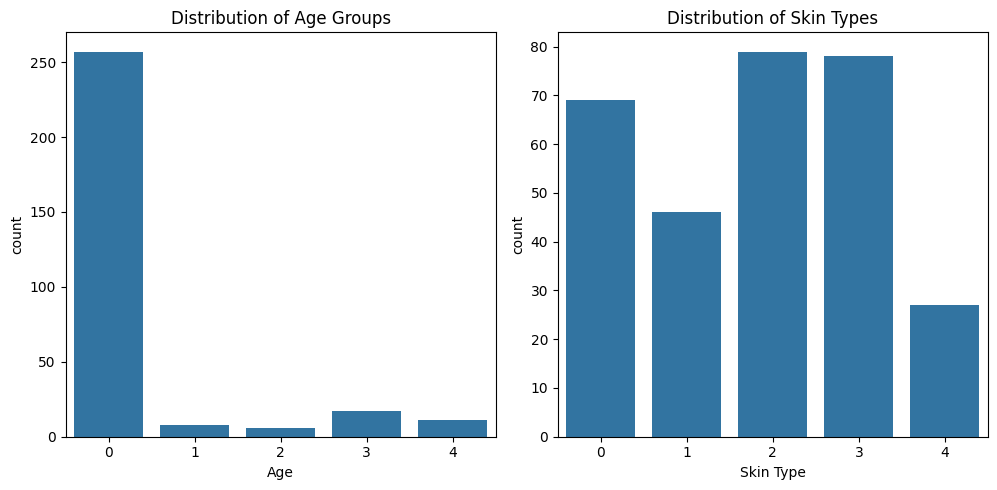

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
sns.countplot(x='Age', data=df)
plt.title('Distribution of Age Groups')

plt.subplot(132)
sns.countplot(x='Skin Type', data=df)
plt.title('Distribution of Skin Types')



plt.tight_layout()
plt.show()

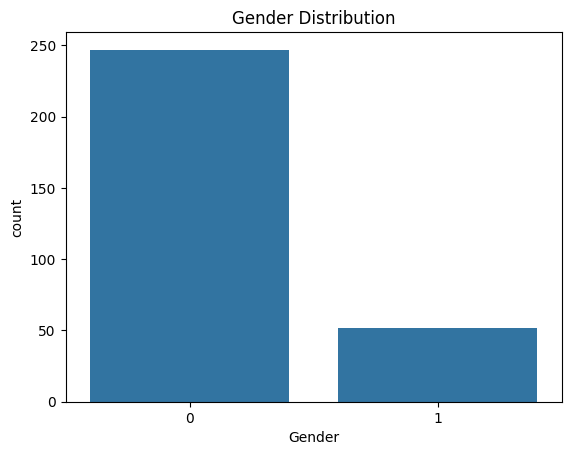

In [ ]:
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

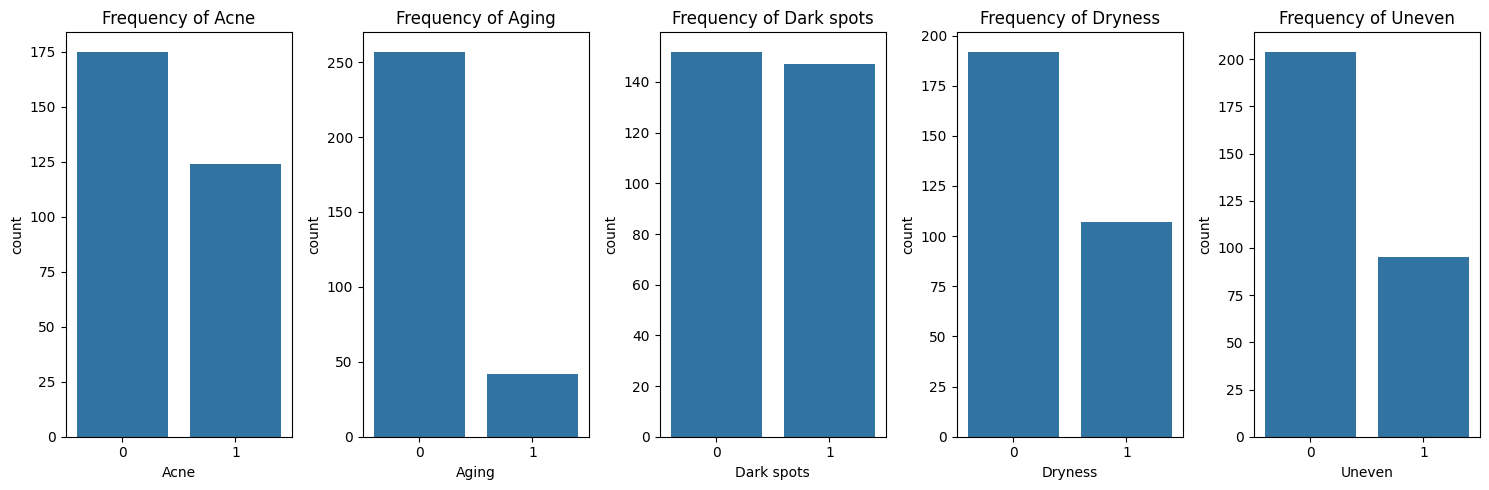

In [ ]:
skin_concerns = ['Acne', 'Aging', 'Dark spots', 'Dryness', 'Uneven']
plt.figure(figsize=(15, 5))

for i, concern in enumerate(skin_concerns, 1):
    plt.subplot(1, 5, i)
    sns.countplot(x=concern, data=df)
    plt.title(f'Frequency of {concern}')

plt.tight_layout()
plt.show()


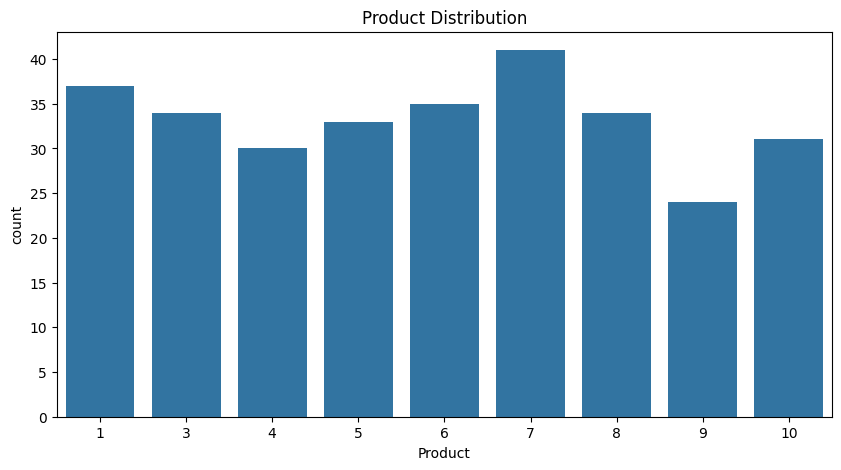

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Product', data=df)
plt.title('Product Distribution')
plt.show()


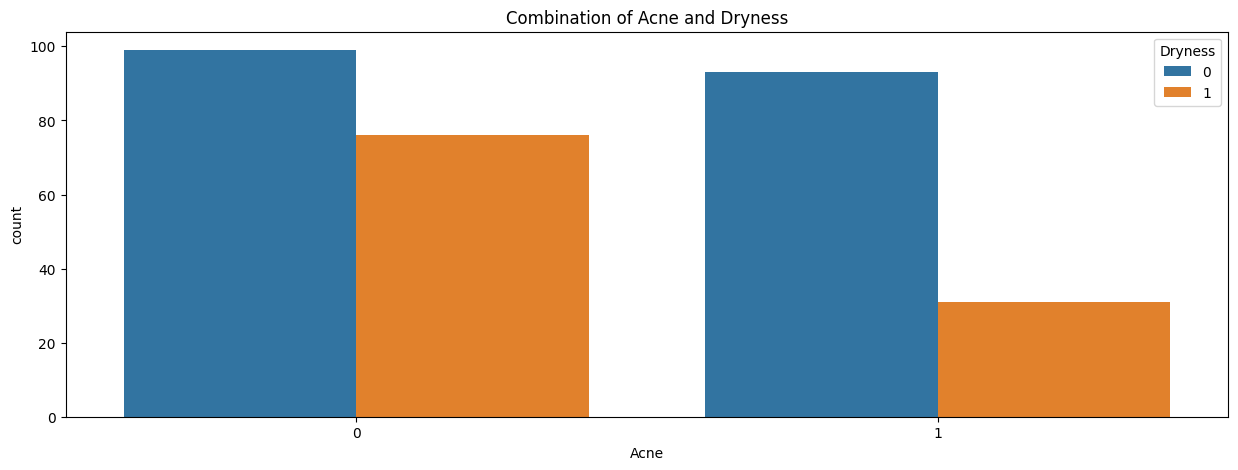

In [ ]:
plt.figure(figsize=(15, 5))
sns.countplot(x='Acne', hue='Dryness', data=df)
plt.title('Combination of Acne and Dryness')
plt.show()

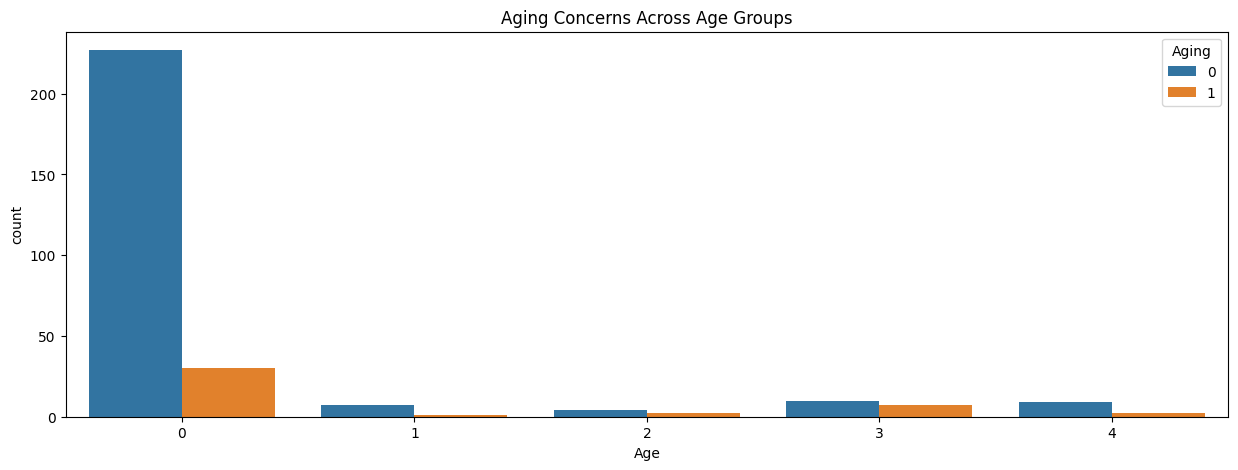

In [ ]:
plt.figure(figsize=(15, 5))
sns.countplot(x='Age', hue='Aging', data=df)
plt.title('Aging Concerns Across Age Groups')
plt.show()

Text(0.5, 1.0, 'Aging Concerns Across Skin Types')

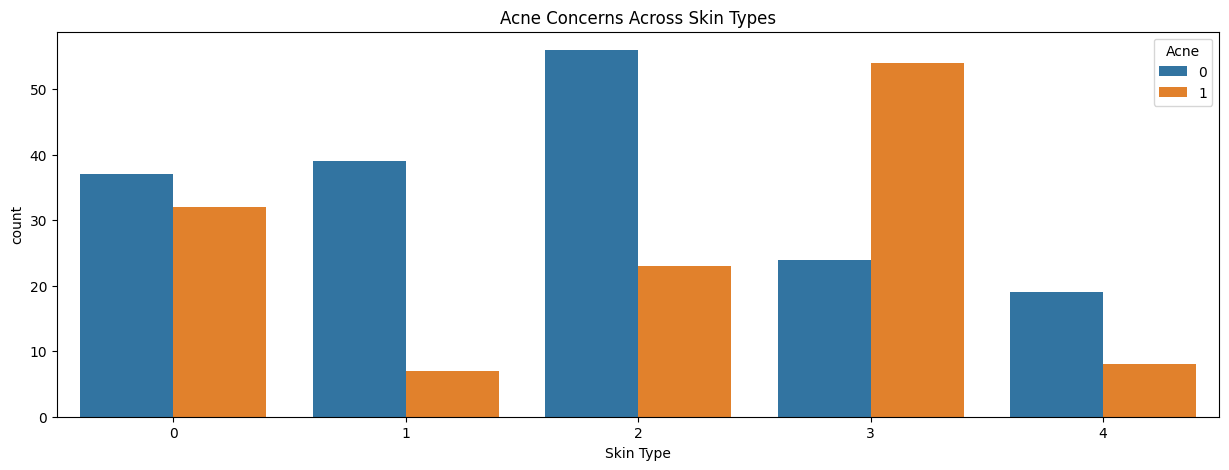

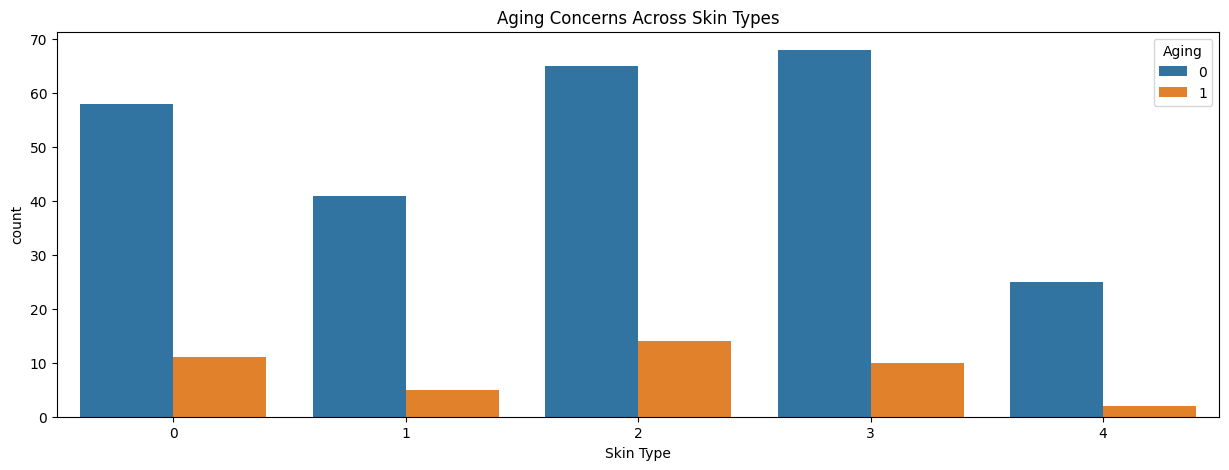

In [ ]:
plt.figure(figsize=(15, 5))
sns.countplot(x='Skin Type', hue='Acne', data=df)
plt.title('Acne Concerns Across Skin Types')

plt.figure(figsize=(15, 5))
sns.countplot(x='Skin Type', hue='Aging', data=df)
plt.title('Aging Concerns Across Skin Types')


Text(0.5, 1.0, 'Age Distribution by Gender')

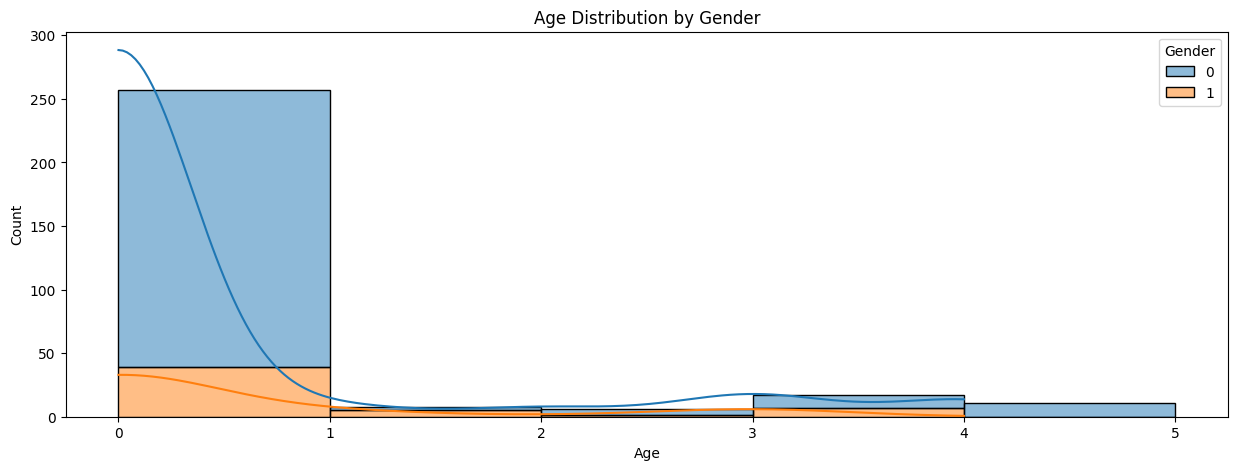

In [ ]:
plt.figure(figsize=(15, 5))
sns.histplot(x='Age', hue='Gender', data=df, multiple='stack', bins=range(0, 6), kde=True)
plt.title('Age Distribution by Gender')


Text(0.5, 1.0, 'Product Purchases by Gender')

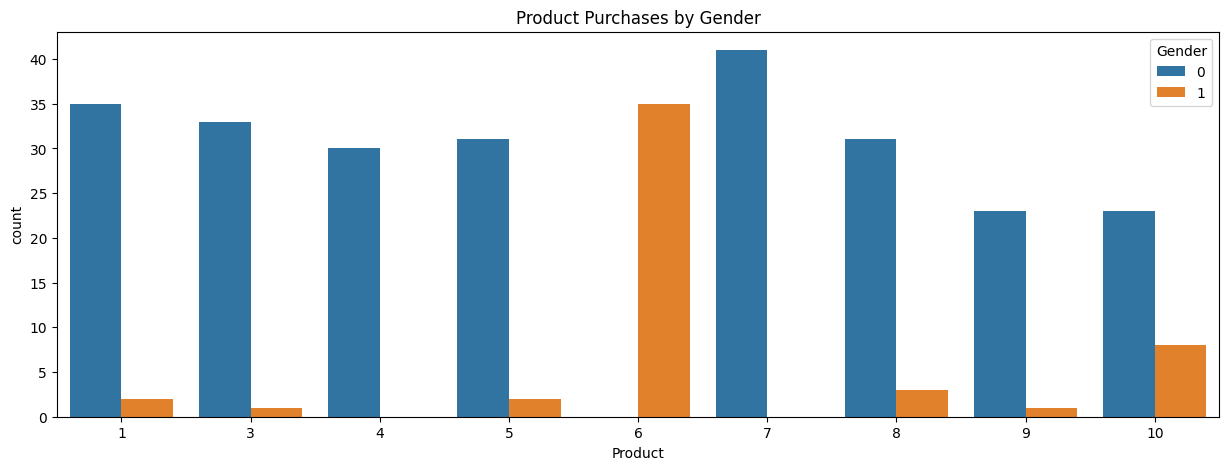

In [ ]:
plt.figure(figsize=(15, 5))
sns.countplot(x='Product', hue='Gender', data=df)
plt.title('Product Purchases by Gender')

Text(0.5, 1.0, 'Age Distribution for Customers with Aging Concerns')

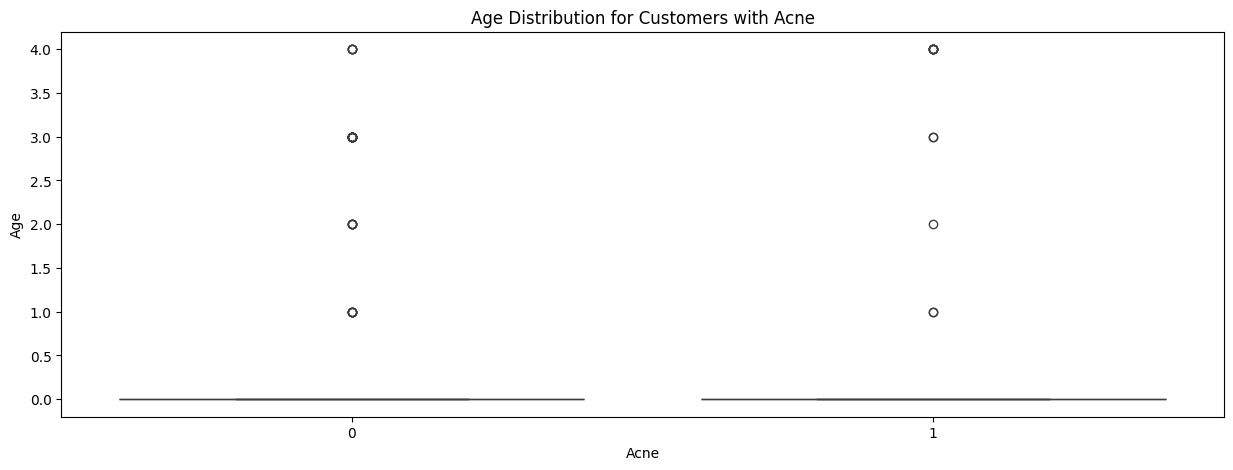

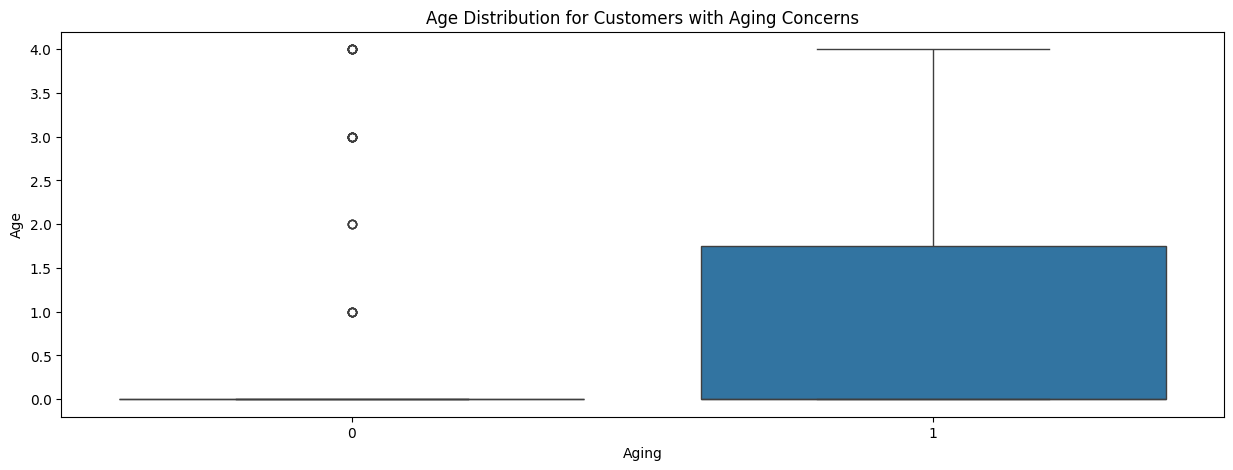

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='Acne', y='Age', data=df)
plt.title('Age Distribution for Customers with Acne')

plt.figure(figsize=(15, 5))
sns.boxplot(x='Aging', y='Age', data=df)
plt.title('Age Distribution for Customers with Aging Concerns')

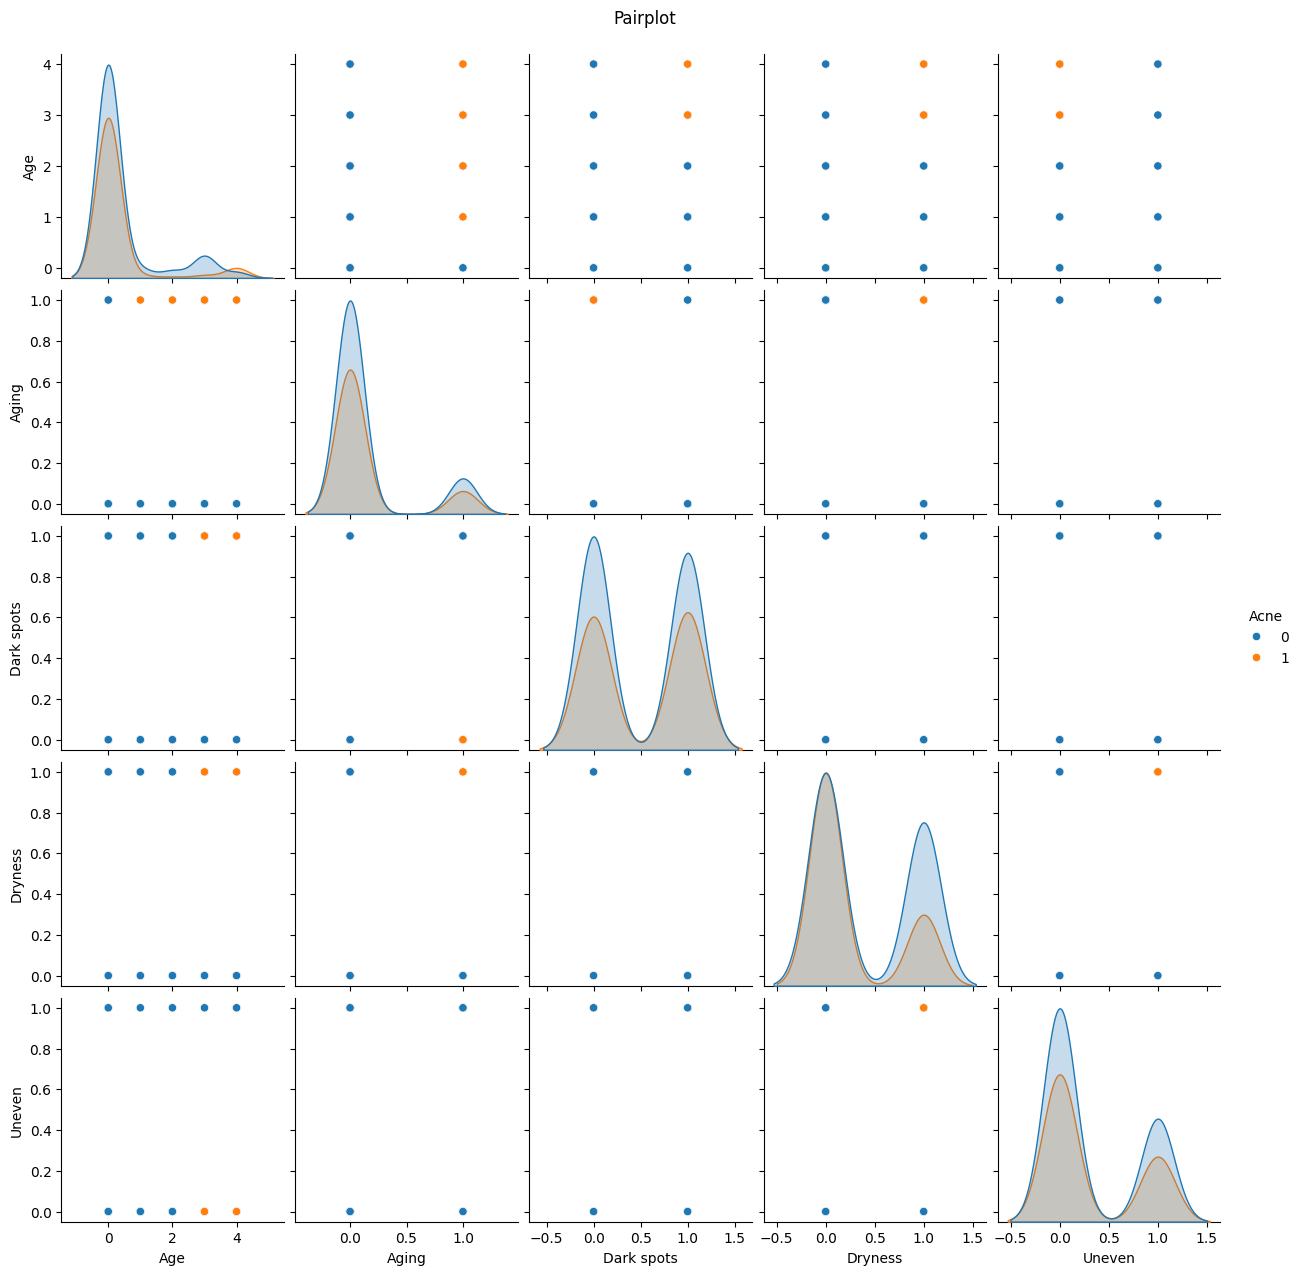

In [ ]:
selected_columns = ['Age', 'Acne', 'Aging', 'Dark spots', 'Dryness', 'Uneven']
sns.pairplot(df[selected_columns], hue='Acne', diag_kind='kde')
plt.suptitle('Pairplot', y=1.02)
plt.show()

Text(0.5, 1.0, 'Age vs. Product Preferences')

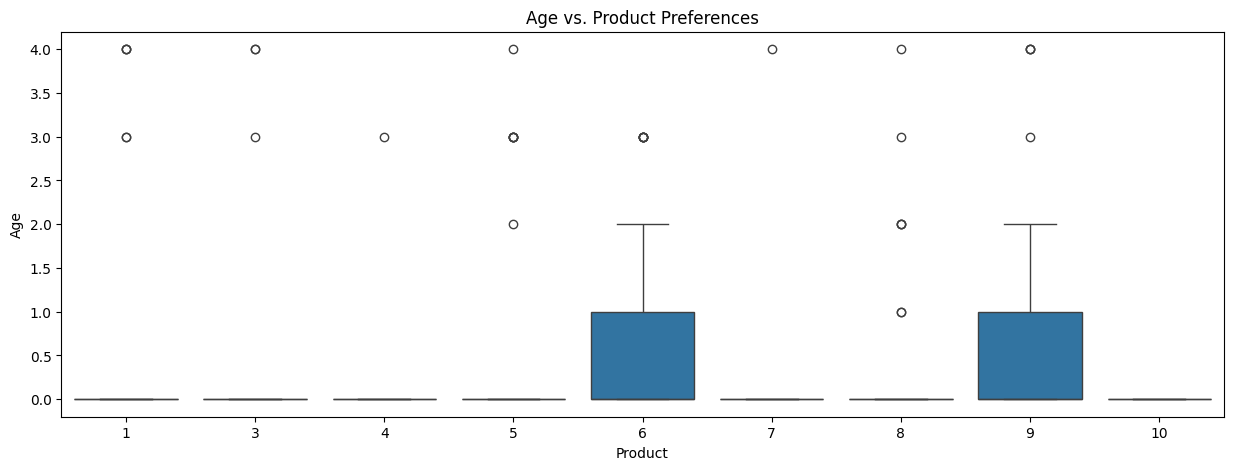

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='Product', y='Age', data=df)
plt.title('Age vs. Product Preferences')

In [ ]:
numerical_columns = df.select_dtypes(include='number').columns
skewness = df[numerical_columns].skew()
print("Skewness of Numerical Columns:")
print(skewness)

Skewness of Numerical Columns:
Gender        1.729306
Age           2.578497
Skin Type    -0.065650
Acne          0.347959
Aging         2.079862
Dark spots    0.033618
Dryness       0.596024
Uneven        0.786931
Product      -0.189985
dtype: float64


Text(0.5, 1.0, 'Distribution of Skin Concern Combinations')

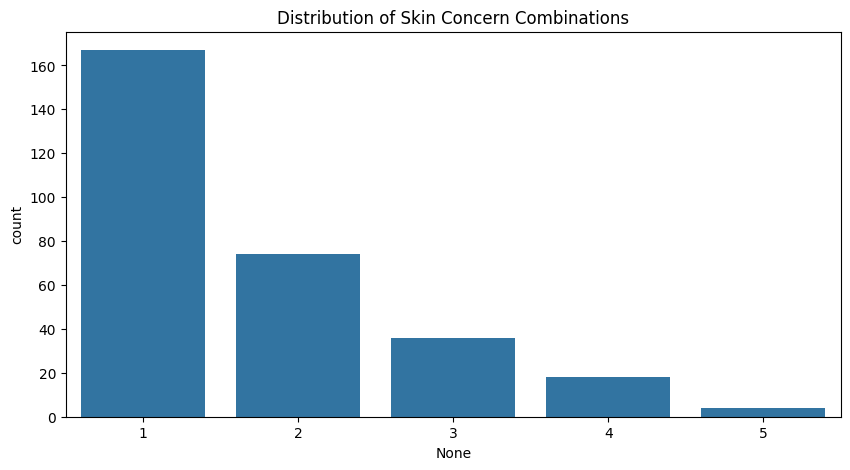

In [ ]:
skin_concern_combinations = df[['Acne', 'Aging', 'Dark spots', 'Dryness', 'Uneven']].sum(axis=1)
plt.figure(figsize=(10, 5))
sns.countplot(x=skin_concern_combinations)
plt.title('Distribution of Skin Concern Combinations')